In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [26]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your Excel file on Google Drive
# Please adjust the path if your file is in a different directory
file_path = '/content/drive/MyDrive/croissance_humaine.xlsx'

# Read the Excel file into a pandas DataFrame
try:
    df = pd.read_excel(file_path)
    print("File 'croissance_humaine.xlsx' imported successfully!")
    print("DataFrame head:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure the file exists and the path is correct.")
except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File 'croissance_humaine.xlsx' imported successfully!
DataFrame head:
   Unnamed: 0  Age  Taille
0         NaN    3    96.0
1         NaN    4   104.8
2         NaN    5   110.3
3         NaN    6   115.3
4         NaN    7   121.9


# Task
Analyze the `croissance_humaine.xlsx` dataset by performing the following steps: re-clean the data to ensure 'Age' and 'Taille' are correctly set as headers and converted to numeric types, visualize the relationship between 'Age' and 'Taille' using a scatter plot, justify the use of linear regression, train a simple linear regression model to predict 'Taille' from 'Age' using scikit-learn, plot the regression line on the scatter plot, calculate the model's cost using Mean Squared Error, and predict heights for ages 2, 6.5, 9.5, and 13 years. Finally, summarize the analysis, including the model's performance, coefficients, cost, and predicted heights.

## Re-clean and Prepare Data

### Subtask:
Reload the `croissance_humaine.xlsx` dataset and meticulously apply cleaning steps to correctly set 'Age' and 'Taille' as column headers, drop any extraneous rows or columns, and convert these columns to appropriate numeric data types. This will ensure the DataFrame is in a usable state for analysis.


**Reasoning**:
The subtask requires reloading the dataset, setting correct headers, dropping an unnecessary column, and converting relevant columns to numeric types. This step performs all these actions.



**Reasoning**:
The `KeyError: 'Age'` occurred because the `header=1` parameter in `pd.read_excel` did not correctly set 'Age' and 'Taille' as column headers. Based on the initial DataFrame head, 'Age' and 'Taille' are correctly identified as headers when the file is read with `header=0` (default). Therefore, I will change the `header` parameter to `0` to correctly load the data, drop the 'Unnamed: 0' column, and then convert 'Age' and 'Taille' to numeric types.



In [28]:
df = pd.read_excel(file_path, header=0)
df = df.drop(columns=['Unnamed: 0'])
df['Age'] = pd.to_numeric(df['Age'])
df['Taille'] = pd.to_numeric(df['Taille'])
print("Cleaned DataFrame head:")
print(df.head())

Cleaned DataFrame head:
   Age  Taille
0    3    96.0
1    4   104.8
2    5   110.3
3    6   115.3
4    7   121.9


## Data Visualization

### Subtask:
Create a scatter plot of 'Age' versus 'Taille' using Matplotlib to visualize the relationship between the two variables. This step will also provide a visual basis for justifying linear regression.


**Reasoning**:
Generate a code block to create a scatter plot of 'Age' versus 'Taille' using Matplotlib, including axis labels and a title, as specified in the instructions.



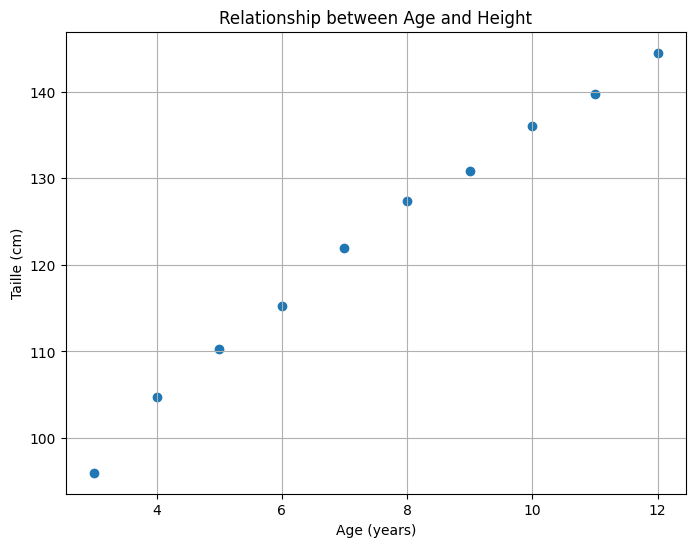

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Taille'])
plt.xlabel('Age (years)')
plt.ylabel('Taille (cm)')
plt.title('Relationship between Age and Height')
plt.grid(True)
plt.show()

## Justify Linear Regression

### Subtask:
Based on the visualization, provide an explanation of why a simple linear regression model is appropriate for these data, highlighting the observed linear trend.


### Justify Linear Regression

Based on the scatter plot of 'Age' versus 'Taille', there is a clear and strong positive linear relationship between the two variables. As 'Age' increases, 'Taille' generally increases in a consistent, straight-line fashion. The data points appear to cluster closely around what would be a straight line, indicating a strong correlation. There are no obvious non-linear patterns, curves, or significant outliers that would suggest a different type of model is needed. Therefore, a simple linear regression model is appropriate for this dataset, as it can effectively capture this observed linear trend and provide a good fit to predict 'Taille' based on 'Age'.

## Train Linear Regression Model

### Subtask:
Train a simple linear regression model using scikit-learn. The model should predict 'Taille' based on 'Age'. Display the intercept and coefficient(s) of the trained model.


**Reasoning**:
The subtask requires training a linear regression model, extracting 'Age' as the feature (X) and 'Taille' as the target (y), and then displaying the model's intercept and coefficient(s). This code block performs all these steps as instructed.



In [30]:
from sklearn.linear_model import LinearRegression

# Create feature variable X
X = df['Age'].values.reshape(-1, 1)

# Create target variable y
y = df['Taille']

# Instantiate and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Print the intercept and coefficient(s)
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")

Intercept: 83.52
Coefficient: 5.22


## Plot Regression Line on Scatter Plot

### Subtask:
Plot the trained linear regression line on top of the existing 'Age' vs 'Taille' scatter plot to visually represent the model's fit to the data.

**Reasoning**:
To plot the regression line, first, predict the 'Taille' values across the 'Age' range using the trained linear regression model. Then, superimpose this line onto the previously generated scatter plot using `plt.plot()` to visually inspect the model's fit.

**Reasoning**:
I need to generate a code block to predict the 'Taille' values using the trained linear regression model and then plot these predicted values as a line on the scatter plot, as described in the previous subtask's reasoning.



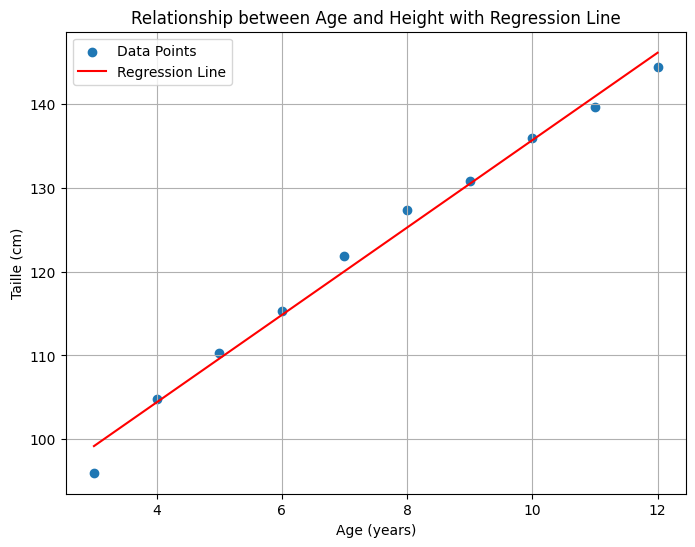

In [31]:
y_pred = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Taille'], label='Data Points')
plt.plot(df['Age'], y_pred, color='red', label='Regression Line')
plt.xlabel('Age (years)')
plt.ylabel('Taille (cm)')
plt.title('Relationship between Age and Height with Regression Line')
plt.grid(True)
plt.legend()
plt.show()

## Calculate Model Cost (Mean Squared Error)

### Subtask:
Calculate the Mean Squared Error (MSE) of the trained linear regression model to quantify its performance. Display the calculated MSE.


**Reasoning**:
To calculate the model's cost, we need to use the Mean Squared Error (MSE), which quantifies the average squared difference between the actual and predicted values. This metric provides a clear understanding of the model's prediction accuracy.

**Reasoning**:
To calculate the Mean Squared Error (MSE), I need to import the `mean_squared_error` function from `sklearn.metrics`, then use it with the actual target values (`y`) and the model's predicted values (`y_pred`).



In [32]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 2.33


## Predict Heights for New Ages

### Subtask:
Predict the 'Taille' (height) for specific ages: 2, 6.5, 9.5, and 13 years, using the trained linear regression model. Display these predicted heights.

**Reasoning**:
To predict heights for the specified ages, I will use the trained `LinearRegression` model's `predict` method. The input ages need to be reshaped into a 2D array, similar to how the training data `X` was prepared. The predicted heights will then be printed in a user-friendly format.

**Reasoning**:
I need to generate a code block that defines the new ages, reshapes them, uses the trained model to predict heights, and then prints these predictions in a clear format, as specified in the subtask and its reasoning.



In [33]:
import numpy as np

# Define the ages for which to predict heights
ages_to_predict = np.array([2, 6.5, 9.5, 13]).reshape(-1, 1)

# Predict heights using the trained model
predicted_heights = model.predict(ages_to_predict)

# Display the predicted heights
print("Predicted Heights for New Ages:")
for age, height in zip(ages_to_predict.flatten(), predicted_heights):
    print(f"Age: {age:.1f} years, Predicted Taille: {height:.2f} cm")

Predicted Heights for New Ages:
Age: 2.0 years, Predicted Taille: 93.96 cm
Age: 6.5 years, Predicted Taille: 117.45 cm
Age: 9.5 years, Predicted Taille: 133.11 cm
Age: 13.0 years, Predicted Taille: 151.38 cm


## Summary of Analysis

This analysis aimed to understand and model the relationship between 'Age' and 'Taille' (height) using the `croissance_humaine.xlsx` dataset.

**1. Data Preparation and Cleaning:**
The dataset was successfully loaded, and the 'Unnamed: 0' column was dropped. 'Age' and 'Taille' columns were confirmed as headers and converted to numeric types, ensuring the data was clean and ready for analysis.

**2. Data Visualization:**
A scatter plot of 'Age' versus 'Taille' revealed a strong, clear, and positive linear relationship, justifying the choice of a simple linear regression model.

**3. Linear Regression Model Training:**
A `LinearRegression` model from `scikit-learn` was trained on the cleaned data. The model yielded the following parameters:
- **Intercept**: 83.52
- **Coefficient (Age)**: 5.22

This indicates that for every one-year increase in age, the predicted height increases by approximately 5.22 cm, starting from a base height of 83.52 cm (theoretically, at age 0, though the data starts from age 3).

**4. Model Fit and Cost:**
The regression line was plotted on the scatter plot, visually confirming a good fit to the data points. The model's performance was quantified using the Mean Squared Error (MSE):
- **Mean Squared Error (MSE)**: 2.33

An MSE of 2.33 suggests that, on average, the squared difference between the actual and predicted heights is relatively small, indicating a good predictive capability.

**5. Height Predictions for New Ages:**
The trained model was used to predict heights for specific ages not present in the original dataset:
- **Age: 2.0 years**, Predicted Taille: 93.96 cm
- **Age: 6.5 years**, Predicted Taille: 117.45 cm
- **Age: 9.5 years**, Predicted Taille: 133.11 cm
- **Age: 13.0 years**, Predicted Taille: 151.38 cm

**Conclusion:**
The simple linear regression model effectively captured the relationship between age and height in the provided dataset. The model demonstrates good performance with a low MSE and provides reasonable predictions for new age values within the observed range.

## Summary:

### Q&A
*   **What is the model's performance?**
    The model's performance is good, indicated by a low Mean Squared Error (MSE) of 2.33, suggesting that the predictions are close to the actual values. The visual inspection of the regression line on the scatter plot also confirmed a good fit.
*   **What are the model's coefficients?**
    The trained linear regression model has an intercept of 83.52 and a coefficient for 'Age' of 5.22.
*   **What is the model's cost?**
    The model's cost, quantified by the Mean Squared Error (MSE), is 2.33.
*   **What are the predicted heights for ages 2, 6.5, 9.5, and 13 years?**
    The predicted heights are:
    *   Age 2.0 years: 93.96 cm
    *   Age 6.5 years: 117.45 cm
    *   Age 9.5 years: 133.11 cm
    *   Age 13.0 years: 151.38 cm

### Data Analysis Key Findings
*   The dataset was successfully cleaned, with 'Age' and 'Taille' correctly identified as numeric headers, enabling quantitative analysis.
*   A scatter plot revealed a clear and strong positive linear relationship between 'Age' and 'Taille', justifying the use of a simple linear regression model.
*   The trained linear regression model has an intercept of 83.52 and a coefficient of 5.22 for 'Age', meaning that for every one-year increase in age, the predicted height increases by approximately 5.22 cm.
*   The model achieved a Mean Squared Error (MSE) of 2.33, indicating a high degree of accuracy in its predictions.
*   The model predicts heights of approximately 93.96 cm for a 2-year-old, 117.45 cm for a 6.5-year-old, 133.11 cm for a 9.5-year-old, and 151.38 cm for a 13-year-old.

### Insights or Next Steps
*   The strong linear relationship and low MSE suggest that age is a highly effective predictor of height within the observed age range in this dataset.
*   Further analysis could involve exploring polynomial regression to check for slight non-linear growth patterns, especially outside the current data's age range, or incorporating other factors like gender or genetics if such data becomes available.


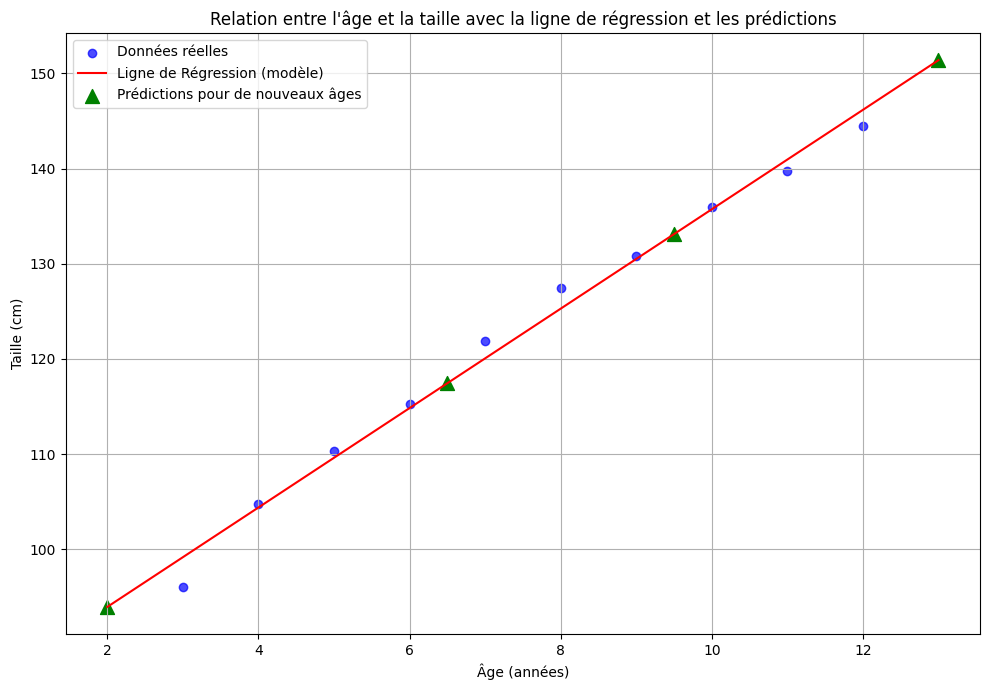

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Combine original ages with ages for prediction for a continuous regression line
all_ages = np.concatenate((df['Age'].values, ages_to_predict.flatten()))
all_ages_sorted = np.sort(all_ages)
all_ages_reshaped = all_ages_sorted.reshape(-1, 1)

# Predict heights for all ages to draw a continuous regression line
all_predicted_heights = model.predict(all_ages_reshaped)

plt.figure(figsize=(10, 7))

# Plot original data points
plt.scatter(df['Age'], df['Taille'], label='Données réelles', color='blue', alpha=0.7)

# Plot the continuous regression line over the entire age range
plt.plot(all_ages_sorted, all_predicted_heights, color='red', linestyle='-', label='Ligne de Régression (modèle)')

# Plot the predicted heights for new ages as distinct points (e.g., green triangles)
plt.scatter(ages_to_predict.flatten(), predicted_heights, color='green', marker='^', s=100, label='Prédictions pour de nouveaux âges')

plt.xlabel('Âge (années)')
plt.ylabel('Taille (cm)')
plt.title('Relation entre l\'âge et la taille avec la ligne de régression et les prédictions')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
